# CROP RECOMMENDATION SYSTEM 

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv('./Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [124]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [125]:
df.size

17600

In [126]:
df.shape

(2200, 8)

In [127]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [129]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [130]:
df.apply(lambda a: len(a.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

## Preprocessing the Data

In [131]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [132]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [133]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [134]:
catCol = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        catCol.append(i)

catCol

['label']

In [135]:
for c in catCol:
    print(c)
    print(df[c].value_counts())

label
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


## Exploratory Data Analysis

In [136]:
# sns.heatmap(df.corr(),annot=True)

In [137]:
def plotContinuous(x):
    figure, axis = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axis[0].set_title('Distribution')
    sns.distplot(x,ax=axis[0])
    axis[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axis[1])
    axis[2].set_title('Relation with Output Variable')
    sns.barplot(x = x,y = df['label'])

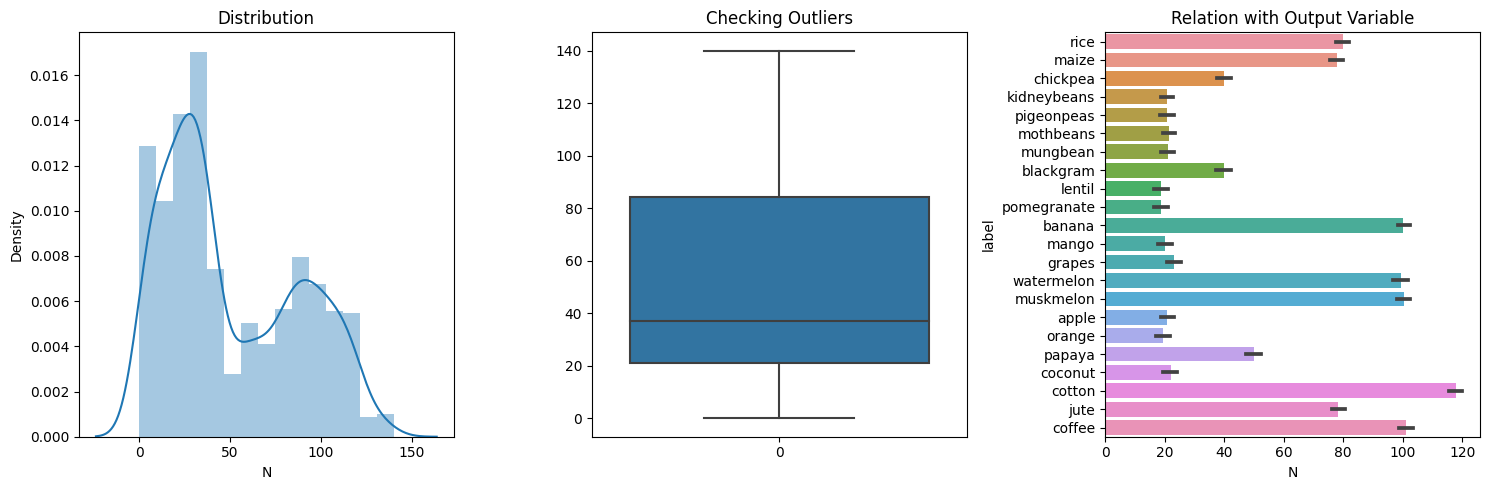

In [138]:
plotContinuous(df['N'])

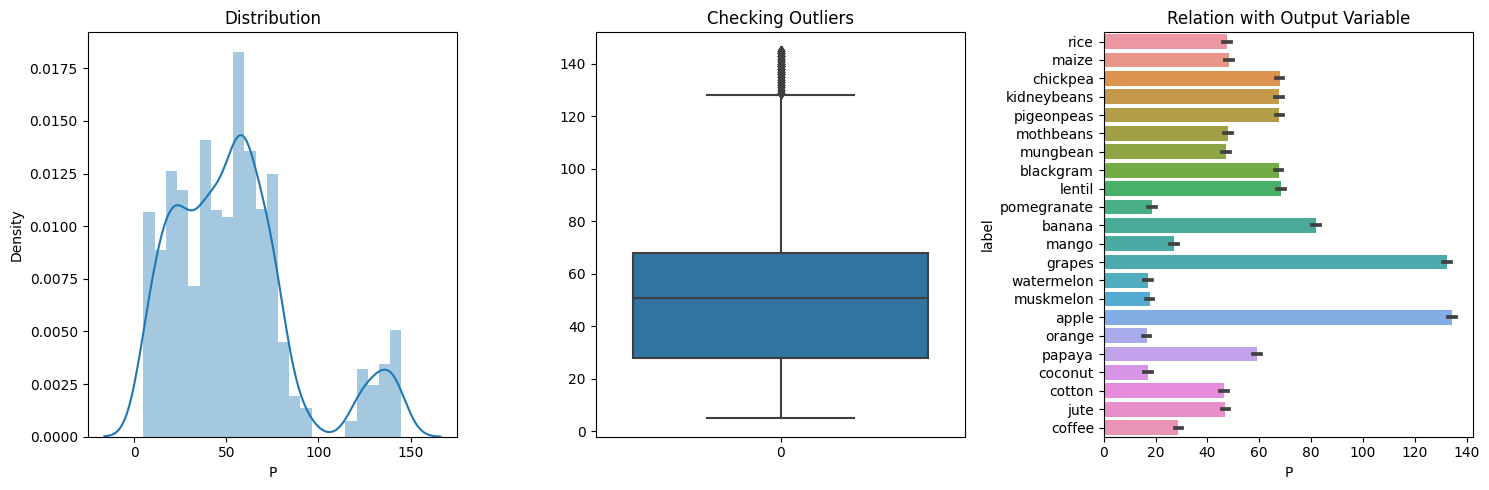

In [139]:
plotContinuous(df['P'])

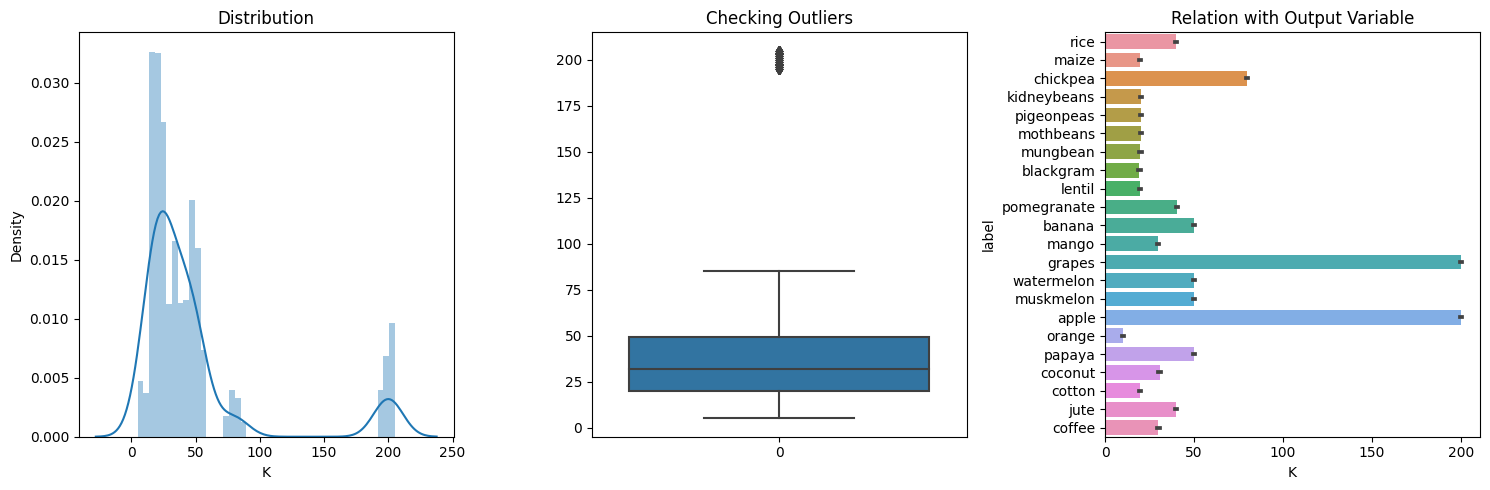

In [140]:
plotContinuous(df['K'])

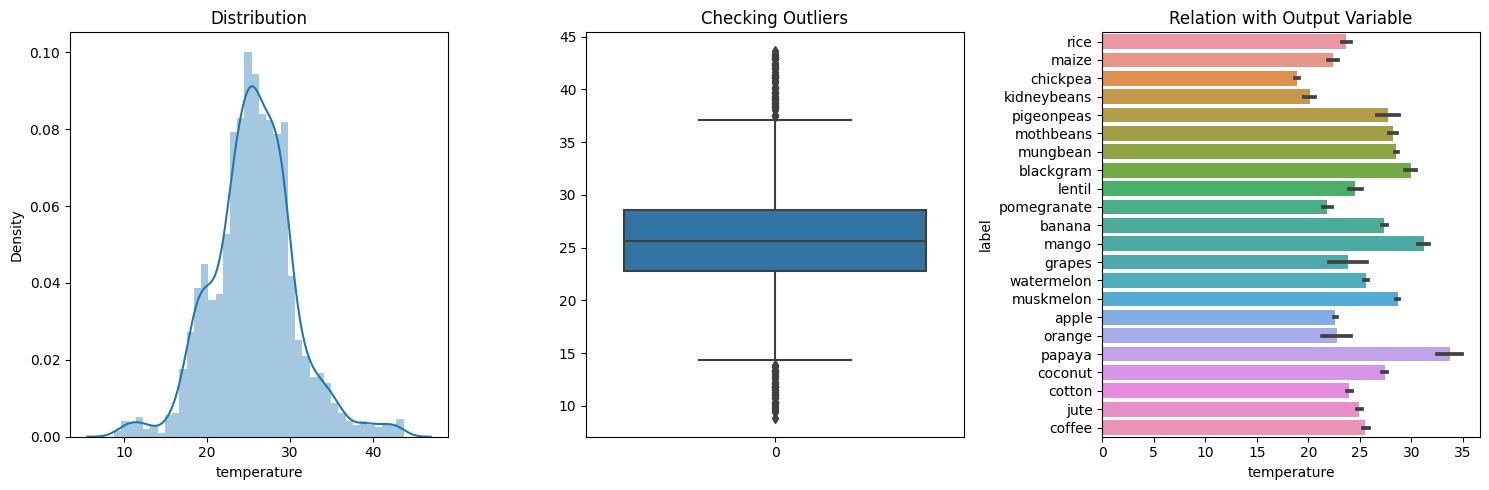

In [141]:
plotContinuous(df['temperature'])

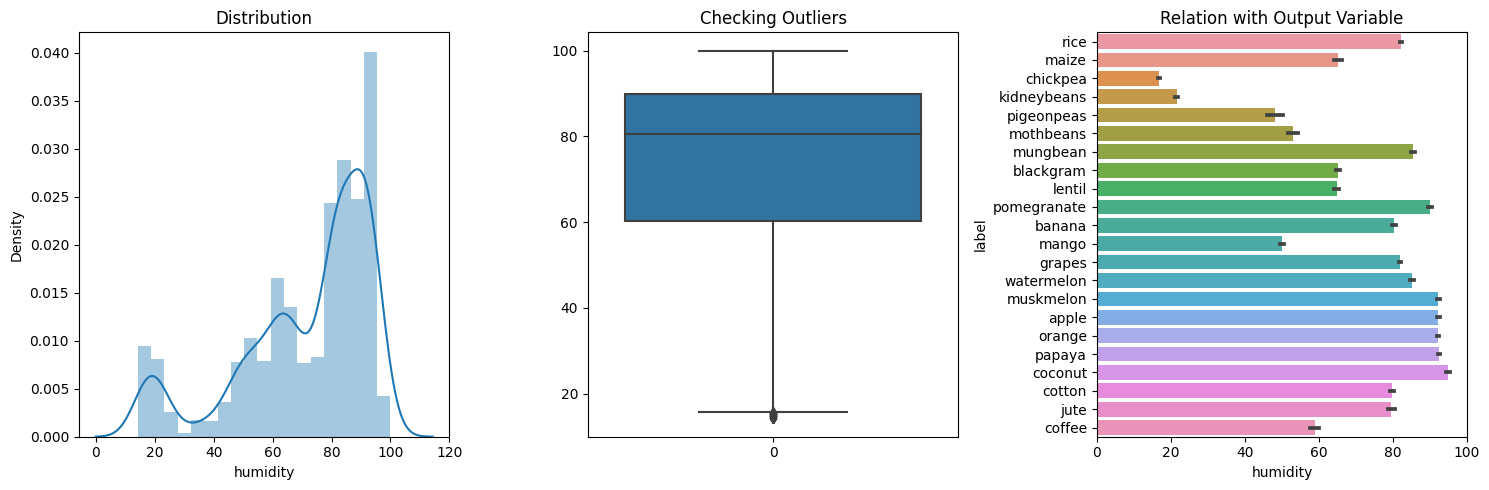

In [142]:
plotContinuous(df['humidity'])

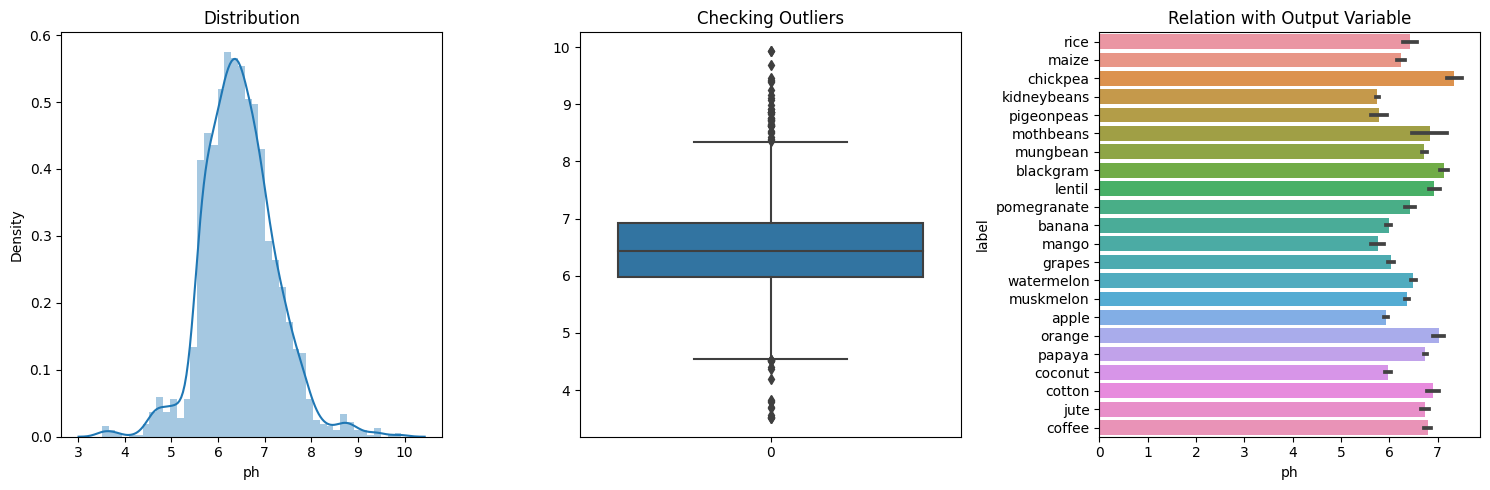

In [143]:
plotContinuous(df['ph'])

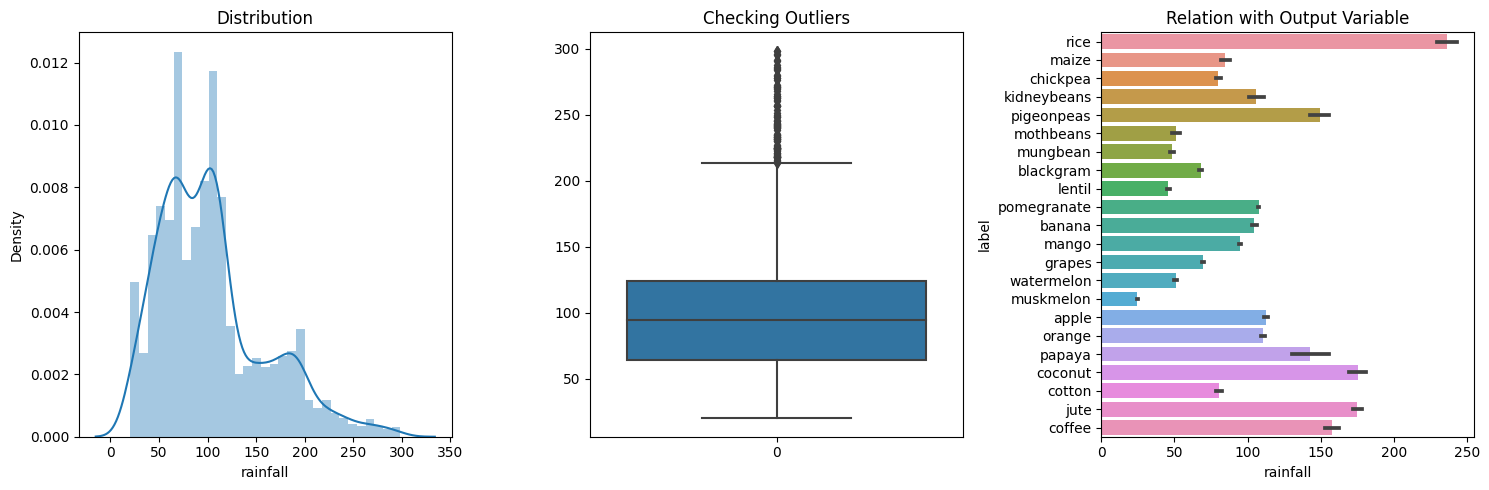

In [144]:
plotContinuous(df['rainfall'])

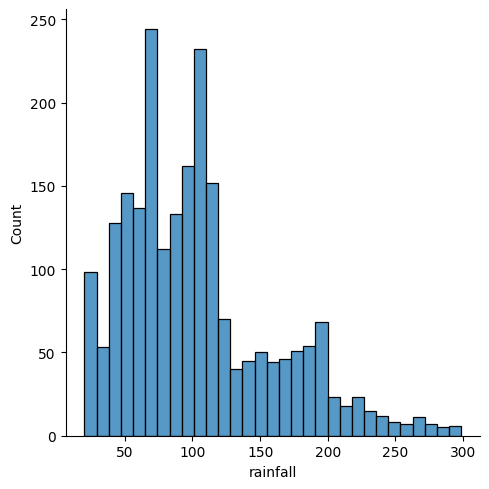

In [145]:
sns.displot(df["rainfall"])

In [146]:
# plt.figure(figsize=(10,10))
# sns.barplot(df["humidity"],df["label"])

In [147]:
# plt.figure(figsize=(10,10))
# sns.barplot(df["temperature"], df['label'])

In [148]:
# plt.xticks(rotation=90)
# sns.countplot(df['label'])

In [149]:
df['label'].value_counts().head()

label
rice       100
maize      100
jute       100
cotton     100
coconut    100
Name: count, dtype: int64

In [150]:
topCrop = df.groupby('label')['rainfall'].sum().reset_index().sort_values(by='rainfall', ascending=False)
topCrop[:5]

,label,rainfall
20,rice,23618.111359
4,coconut,17568.664580
8,jute,17479.279754
5,coffee,15806.629488
18,pigeonpeas,14945.756381


### Seperating features and target label

In [151]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [152]:
accuracy = []
model = []

In [153]:
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Model 1: Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

dt.fit(XTrain,YTrain)

predictValues = dt.predict(XTest)
trial = metrics.accuracy_score(YTest, predictValues)
accuracy.append(trial * 100)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", trial * 100)

print(classification_report(YTest,predictValues))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [155]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(dt, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [177]:

import pickle

dtPKLFilename = 'crDtClassifier.pkl'
dtModelPKL = open(dtPKLFilename, 'wb')
pickle.dump(dt, dtModelPKL)
dtModelPKL.close()

# Model 2: Guassian Naive Bayes

In [157]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(XTrain,YTrain)

predictValues = nb.predict(XTest)
trail = metrics.accuracy_score(YTest, predictValues)


In [158]:
accuracy.append(trial * 100)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", trial * 100)

print(classification_report(YTest,predictValues))

Naive Bayes's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00     

In [159]:
# Cross validation score (NaiveBayes)
score = cross_val_score(nb,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [160]:
"""
import pickle

gnbpklFilename = 'crGnbClassifier.pkl'
gnbModelpkl = open(gnbpklFilename, 'wb')
pickle.dump(nb, gnbModelpkl)
gnbModelpkl.close()
"""

"\nimport pickle\n\ngnbpklFilename = 'crGnbClassifier.pkl'\ngnbModelpkl = open(gnbpklFilename, 'wb')\npickle.dump(nb, gnbModelpkl)\ngnbModelpkl.close()\n"

# Model 3: Support Vector Machine (SVM)

In [161]:
from sklearn.svm import SVC

svm = SVC(gamma='auto')

svm.fit(XTrain,YTrain)

predictValues = svm.predict(XTest)

trail = metrics.accuracy_score(YTest, predictValues)
accuracy.append(trail * 100)
model.append('SVM')
print("SVM's Accuracy is: ", trail * 100)

print(classification_report(YTest,predictValues))

SVM's Accuracy is:  10.681818181818182
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.0

In [162]:
# Cross validation score (SVM)
score = cross_val_score(svm,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

# Model 4: Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=2)

lr.fit(XTrain,YTrain)

predictValues = lr.predict(XTest)

trail = metrics.accuracy_score(YTest, predictValues)
accuracy.append(trail * 100)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", trail * 100)

print(classification_report(YTest,predictValues))

Logistic Regression's Accuracy is:  95.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00    

In [164]:
# Cross validation score (Logistic Regression)
score = cross_val_score(lr,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

### Saving trained Logistic Regression model

In [165]:
"""
import pickle

lrPklFilename = 'crLogisticRegression.pkl'
lrModelPkl = open(lrPklFilename, 'wb')
pickle.dump(lr, lrModelPkl)
lrModelPkl.close()
"""

"\nimport pickle\n\nlrPklFilename = 'crLogisticRegression.pkl'\nlrModelPkl = open(lrPklFilename, 'wb')\npickle.dump(lr, lrModelPkl)\nlrModelPkl.close()\n"

# Model 5: Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(XTrain,YTrain)

predictValues = rf.predict(XTest)

trail = metrics.accuracy_score(YTest, predictValues)
accuracy.append(trail * 100)
model.append('RF')
print("RF's Accuracy is: ", trail * 100)

print(classification_report(YTest,predictValues))

RF's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00  

In [167]:
# Cross validation score (Random Forest)
score = cross_val_score(rf,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [168]:
"""
import pickle

rfPklFilename = 'RandomForest.pkl'
rfModelPkl = open(rfPklFilename, 'wb')
pickle.dump(rf, rfModelPkl)
rfModelPkl.close()
"""

"\nimport pickle\n\nrfPklFilename = 'RandomForest.pkl'\nrfModelPkl = open(rfPklFilename, 'wb')\npickle.dump(rf, rfModelPkl)\nrfModelPkl.close()\n"

# Model 6: XGBoost

In [169]:
# import xgboost as xg
# xgb = xg.XGBClassifier()
# xgb.fit(XTrain,YTrain)

# predictValues = xgb.predict(XTest)

# trail = metrics.accuracy_score(YTest, predictValues)
# accuracy.append(trail * 100)
# model.append('XGBoost')
# print("XGBoost's Accuracy is: ", trail * 100)

# print(classification_report(YTest,predictValues))

In [170]:
# score = cross_val_score(xgb,features,target,cv=5)
# score

### Saving trained XGBoost model

In [171]:
"""
import pickle

xgbPklFilename = 'crXGBoost.pkl'
xgbModelPkl = open(xgbPklFilename, 'wb')
pickle.dump(xgb, xgbModelPkl)
xgbModelPkl.close()
"""

"\nimport pickle\n\nxgbPklFilename = 'crXGBoost.pkl'\nxgbModelPkl = open(xgbPklFilename, 'wb')\npickle.dump(xgb, xgbModelPkl)\nxgbModelPkl.close()\n"

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

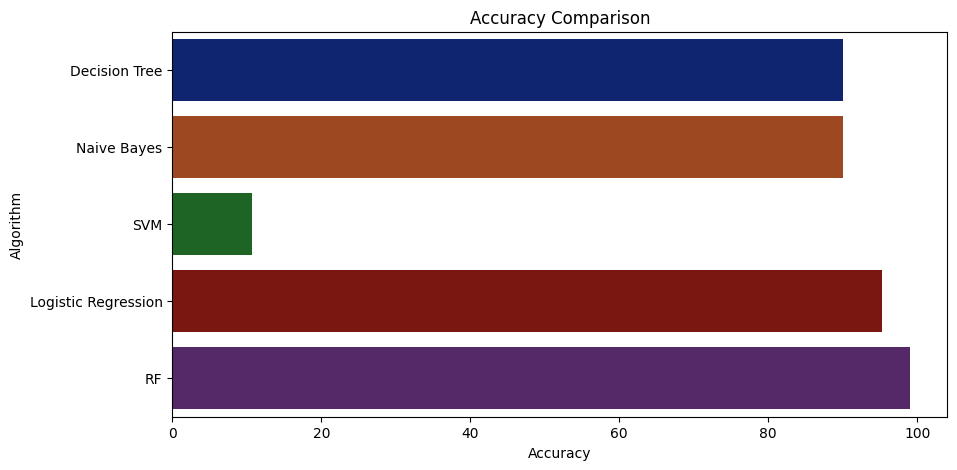

In [172]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy, y = model, palette='dark')

In [173]:
accuracyModels = dict(zip(model, accuracy))
for i, j in accuracyModels.items():
    print (i, '-->', j, '%')

Decision Tree --> 90.0 %
Naive Bayes --> 90.0 %
SVM --> 10.681818181818182 %
Logistic Regression --> 95.22727272727273 %
RF --> 99.0909090909091 %


## Making a prediction

In [174]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = dt.predict(data)
print(prediction)

['coffee']


In [175]:
data = np.array([[20, 59, 60, 28, 70.3, 7.0, 150.9]])
prediction = dt.predict(data)
print(prediction)

['papaya']


In [176]:
#ClassifierCV
#RegessionCV